In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [6]:
df_test.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [7]:
df_train.shape , df_test.shape

((2351, 25), (486, 25))

In [8]:
df_train['Disease'] = df_train['Disease'].replace('Heart Di', 'Heart Disease')
df_test['Disease'] = df_test['Disease'].replace('Heart Di', 'Heart Disease')


In [9]:
df= pd.concat([df_train,df_test],axis=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2837 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                       

In [11]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


([<matplotlib.patches.Wedge at 0x146bab67fd0>,
 [Text(0.6632983317768872, 0.8775165656909267, 'Diabetes'),
  Text(-0.9591572483130277, 0.5385326109053946, 'Anemia'),
  Text(-0.6901835976023258, -0.8565317283094136, 'Healthy'),
  Text(0.5840929253320241, -0.932113434393625, 'Thalasse'),
  Text(1.0683937816906224, -0.2617913811507383, 'Thromboc'),
  Text(1.0989743335320163, -0.047491201688950165, 'Heart Disease')],
 [Text(0.3617990900601203, 0.4786453994677782, '29.4%'),
  Text(-0.5231766808980151, 0.2937450604938516, '24.9%'),
  Text(-0.3764637805103595, -0.4671991245324073, '19.8%'),
  Text(0.3185961410901949, -0.5084255096692499, '19.6%'),
  Text(0.5827602445585212, -0.1427952988094936, '4.9%'),
  Text(0.5994405455629179, -0.025904291830336452, '1.4%')])

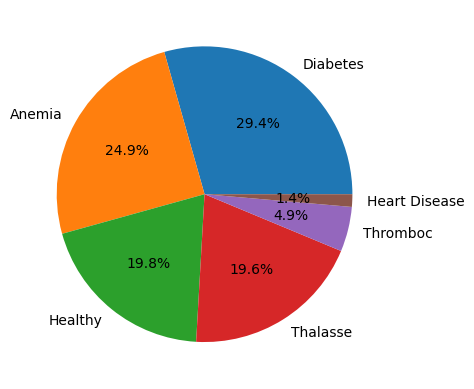

In [12]:
plt.pie(df['Disease'].value_counts(), labels = df['Disease'].value_counts().index, autopct='%1.1f%%')

In [64]:
model_df = df.copy()
model_df = model_df[(model_df['Disease'] != 'Thromboc') & (model_df['Disease'] != 'Heart Disease')]

([<matplotlib.patches.Wedge at 0x146cdaff490>,
 [Text(0.6078139062483241, 0.9168218231320377, 'Diabetes'),
  Text(-1.0386543257436056, 0.3622115288254866, 'Anemia'),
  Text(-0.4366599124496239, -1.0096178093018602, 'Healthy'),
  Text(0.8702765629900657, -0.6727694284895817, 'Thalasse')],
 [Text(0.3315348579536313, 0.5000846307992933, '31.4%'),
  Text(-0.5665387231328757, 0.19756992481390173, '26.6%'),
  Text(-0.2381781340634312, -0.55070062325556, '21.1%'),
  Text(0.4746963070854903, -0.3669651428124991, '20.9%')])

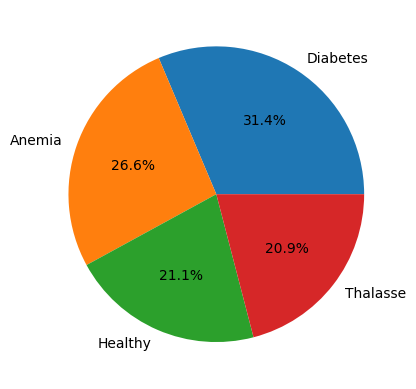

In [65]:
plt.pie(model_df['Disease'].value_counts(), labels = model_df['Disease'].value_counts().index, autopct='%1.1f%%')

In [66]:
df_anemia = df[df['Disease'] == 'Anemia']
df_diabetes = df[df['Disease'] == 'Diabetes']
df_healthy = df[df['Disease'] == 'Healthy']
df_thalasse = df[df['Disease'] == 'Thalasse']

In [67]:
print('Anemia:',df_anemia['Hemoglobin'].mean())
print('Diabetes:',df_diabetes['Hemoglobin'].mean())
print('Healthy:',df_healthy['Hemoglobin'].mean())
print('Thalasse:' , df_thalasse['Hemoglobin'].mean())


Anemia: 0.48463419081148856
Diabetes: 0.5787402253193367
Healthy: 0.5762577410047449
Thalasse: 0.6201317218006299


In [68]:
def calculate_column_means(dfs, column_name):
    means = {}
    for disease, df in dfs.items():
        if column_name in df.columns:
            means[disease] = df[column_name].mean()
        else:
            means[disease] = f"'{column_name}' sütunu {disease} hastalığı veri çerçevesinde bulunamadı."
    return means

diseases = {
    'Anemia': df_anemia,
    'Diabetes': df_diabetes,
    'Healthy': df_healthy,
    'Thalasse': df_thalasse
}

column_means_hemoglobin = calculate_column_means(diseases, 'Hemoglobin')
column_means_insulin = calculate_column_means(diseases, 'Insulin')
column_means_bmi = calculate_column_means(diseases, 'BMI')
column_means_HbA1c = calculate_column_means(diseases, 'HbA1c')
column_means_heart= calculate_column_means(diseases, 'Heart Rate')
column_means_glucose= calculate_column_means(diseases, 'Glucose')
column_means_hemotocrit= calculate_column_means(diseases, 'Hematocrit')
column_means_mcv= calculate_column_means(diseases, 'Mean Corpuscular Volume')
column_means_red_blod= calculate_column_means(diseases, 'Red Blood Cells')

print('Hemoglobin Mean:')
for disease, mean in column_means_hemoglobin.items():
    print(disease, ':', mean)

print('\nInsulin Mean:')
for disease, mean in column_means_insulin.items():
    print(disease, ':', mean)

print('\nBMI Mean:')
for disease, mean in column_means_bmi.items():
    print(disease, ':', mean)

print('\nHbA1c Mean:')
for disease, mean in column_means_HbA1c.items():
    print(disease, ':', mean)

   

Hemoglobin Mean:
Anemia : 0.48463419081148856
Diabetes : 0.5787402253193367
Healthy : 0.5762577410047449
Thalasse : 0.6201317218006299

Insulin Mean:
Anemia : 0.39226106923498455
Diabetes : 0.5671648174059181
Healthy : 0.441770197086557
Thalasse : 0.4209349955057781

BMI Mean:
Anemia : 0.35908783801009414
Diabetes : 0.5131221221029352
Healthy : 0.4472243417973768
Thalasse : 0.5011255722888323

HbA1c Mean:
Anemia : 0.3705760957496627
Diabetes : 0.5291815856376035
Healthy : 0.430783714494808
Thalasse : 0.4251641250203577


In [69]:
print('\nHeart Rate Mean:')
for disease, mean in column_means_heart.items():
    print(disease, ':', mean)

print('\nGlucose Mean:')
for disease, mean in column_means_glucose.items():
    print(disease, ':', mean)





Heart Rate Mean:
Anemia : 0.6454054417869559
Diabetes : 0.5213085849297326
Healthy : 0.5162879291915223
Thalasse : 0.552618635262064

Glucose Mean:
Anemia : 0.2741855133914578
Diabetes : 0.48073036699997596
Healthy : 0.4262635100951951
Thalasse : 0.36487376014079814



anemi için hemog düşük hemotog düşük red blood düşük heart rate yüksek
diabet hb1a yüksek insülin dşük BMI yüksek
talassami MCV RBC Hemog MCHC düşük


In [70]:
print('\nHematocrit Mean:')
for disease, mean in column_means_hemotocrit.items():
    print(disease, ':', mean)


print('\nRed Blood Cells Mean:')
for disease, mean in column_means_red_blod.items():
    print(disease, ':', mean) 


Hematocrit Mean:
Anemia : 0.3322411524298398
Diabetes : 0.5650246886535831
Healthy : 0.5663795296847652
Thalasse : 0.5516517569895935

Red Blood Cells Mean:
Anemia : 0.4006258005565723
Diabetes : 0.4437067889835865
Healthy : 0.6427847128645536
Thalasse : 0.5579082438032905


In [71]:
numeric_cols =['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein' ]

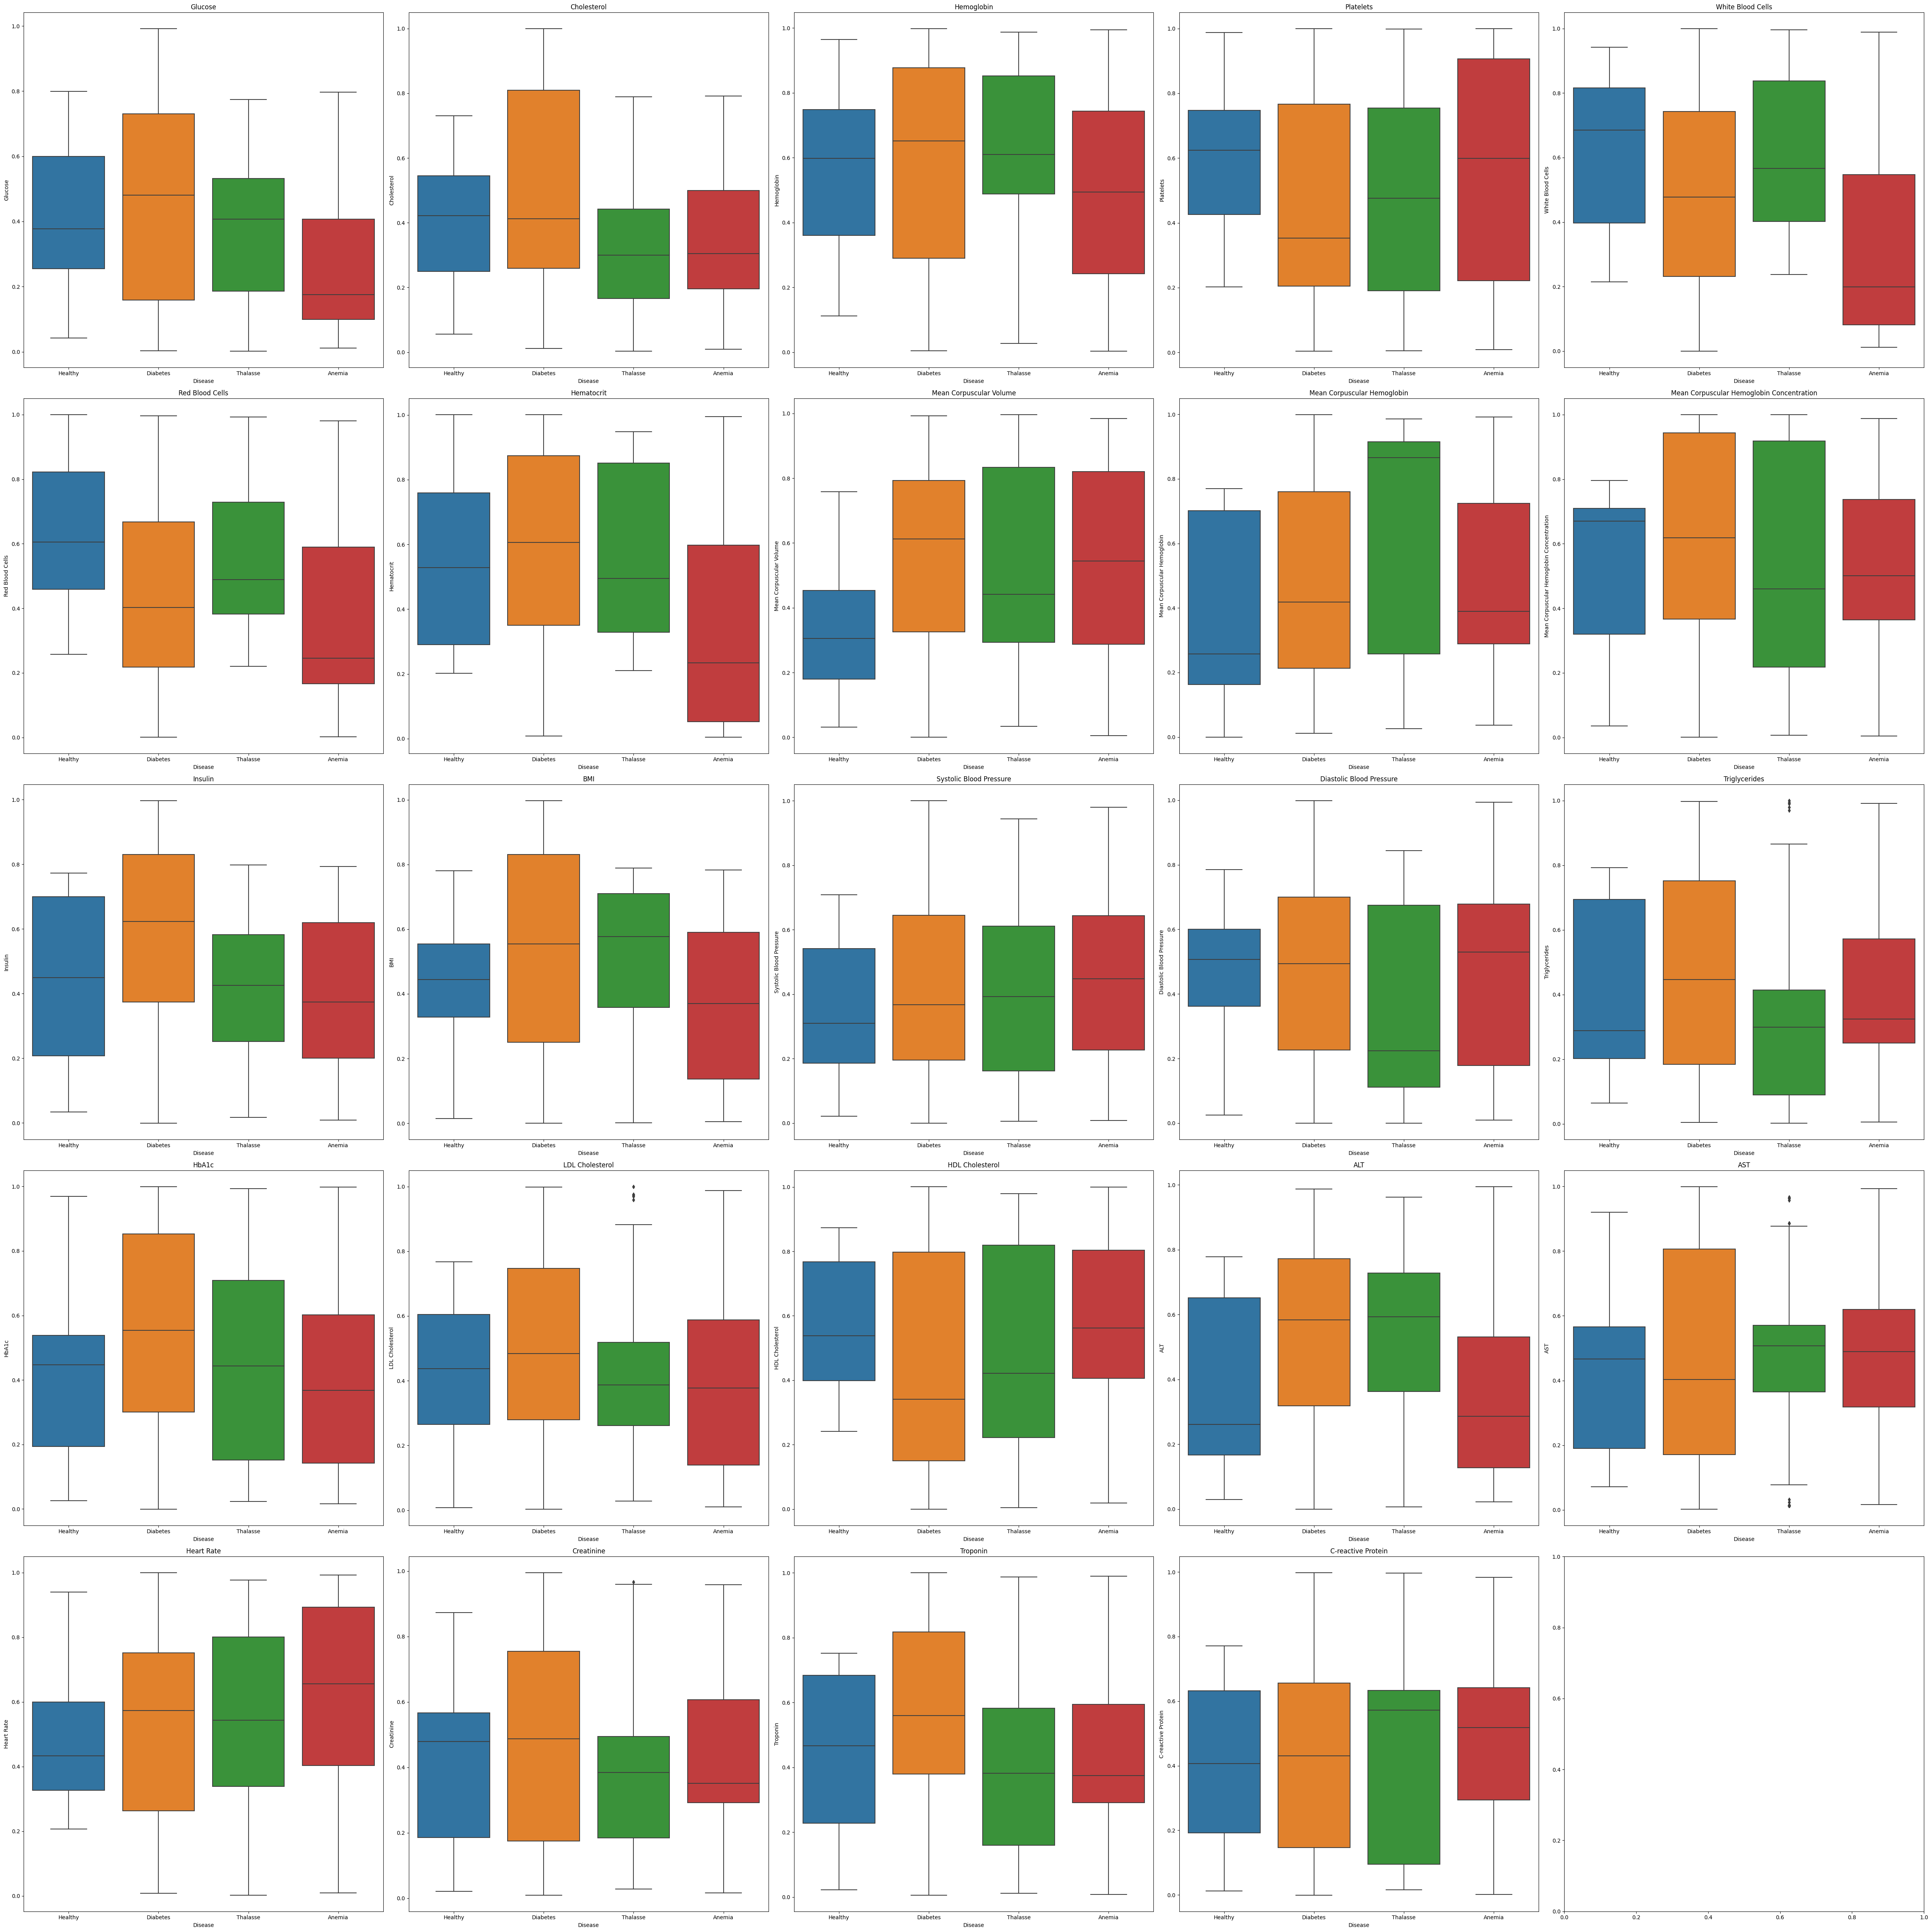

In [72]:
f, ax = plt.subplots(5,5, figsize=(50, 50))
ax = ax.flatten()

for index, cols in enumerate(numeric_cols):
    sns.boxplot(data =model_df, x = 'Disease', y = cols, ax=ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

In [73]:
model_df.Disease = model_df.Disease.astype('category')
d = dict(enumerate(model_df.Disease.cat.categories))
model_df.Disease = model_df.Disease.cat.codes.values
model_df.Disease

0      2
1      1
2      3
3      0
4      3
      ..
480    1
481    1
483    0
484    1
485    1
Name: Disease, Length: 2659, dtype: int8

In [74]:
X = model_df.drop(columns=['Disease'])
y = model_df['Disease']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [76]:
log_model = LogisticRegression()
rf_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()
xgb_model = XGBClassifier()

In [77]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [78]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
svm_model.fit(X_train, y_train)

SVC()

In [80]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
gnb_model.fit(X_train, y_train)

GaussianNB()

In [92]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Logistic Regression

In [82]:
y_pred_log = log_model.predict(X_test)
print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Precision: {precision_score(y_test, y_pred_log, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_log, average='weighted')}")
print(f"F1 score: {f1_score(y_test, y_pred_log, average='weighted')}")

Logistic Regression
Accuracy: 0.8703007518796992
Precision: 0.8729204598255201
Recall: 0.8703007518796992
F1 score: 0.8697176213369975


Random Forest


In [83]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print(f"F1 score: {f1_score(y_test, y_pred_rf, average='weighted')}")

Random Forest Classifier
Accuracy: 0.9774436090225563
Precision: 0.978955769311547
Recall: 0.9774436090225563
F1 score: 0.9775626417596602


SVM Modeli

In [84]:
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted')}")
print(f"F1 score: {f1_score(y_test, y_pred_svm, average='weighted')}")

Support Vector Classifier
Accuracy: 0.9642857142857143
Precision: 0.9655183528538792
Recall: 0.9642857142857143
F1 score: 0.9644112272599462


KNN Modeli

In [85]:
y_pred_knn = knn_model.predict(X_test)
print("K Nearest Neighbours")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted')}")
print(f"F1 score: {f1_score(y_test, y_pred_knn, average='weighted')}")

K Nearest Neighbours
Accuracy: 0.924812030075188
Precision: 0.9290079758527663
Recall: 0.924812030075188
F1 score: 0.9245590250694969


Gaussian

In [86]:
y_pred_gnb = gnb_model.predict(X_test)
print("Gaussian Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb)}")
print(f"Precision: {precision_score(y_test, y_pred_gnb, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_gnb, average='weighted')}")
print(f"F1 score: {f1_score(y_test, y_pred_gnb, average='weighted')}")

Gaussian Naive Bayes
Accuracy: 0.8214285714285714
Precision: 0.8290246050864
Recall: 0.8214285714285714
F1 score: 0.8220086521156266


array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'White Blood Cells'}>],
       [<Axes: title={'center': 'Red Blood Cells'}>,
        <Axes: title={'center': 'Hematocrit'}>,
        <Axes: title={'center': 'Mean Corpuscular Volume'}>,
        <Axes: title={'center': 'Mean Corpuscular Hemoglobin'}>,
        <Axes: title={'center': 'Mean Corpuscular Hemoglobin Concentration'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Systolic Blood Pressure'}>,
        <Axes: title={'center': 'Diastolic Blood Pressure'}>,
        <Axes: title={'center': 'Triglycerides'}>],
       [<Axes: title={'center': 'HbA1c'}>,
        <Axes: title={'center': 'LDL Cholesterol'}>,
        <Axes: title={'center': 'HDL Cholesterol'}>,
        <Axes: title={'center': 'ALT'}

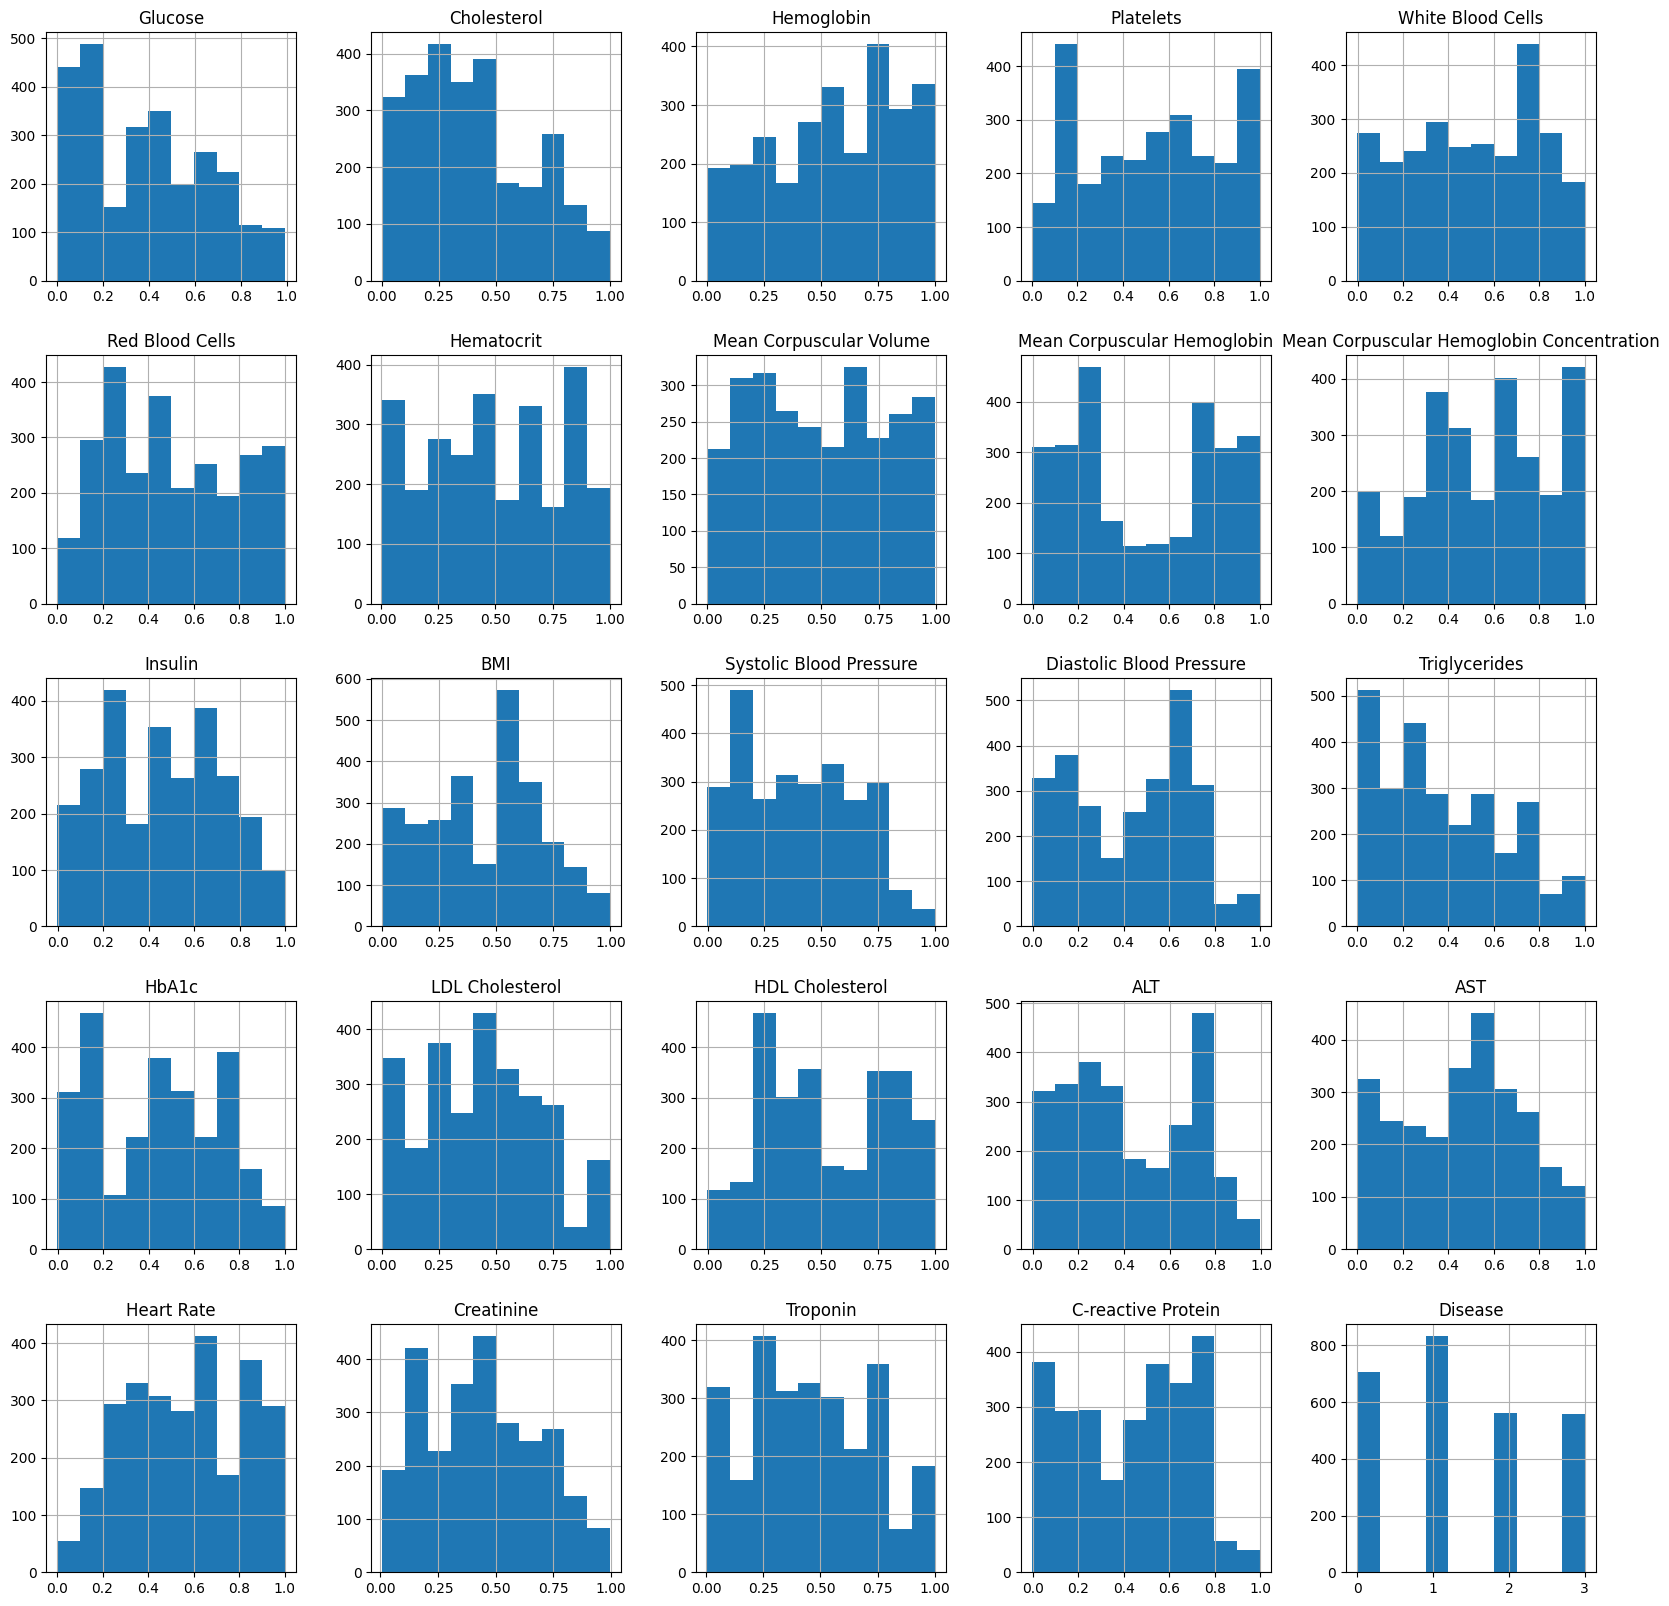

In [87]:
model_df.hist(figsize=(20, 20))

In [88]:
model_df.corr()['Disease'].sort_values(ascending=False)

Disease                                      1.000000
White Blood Cells                            0.379455
Red Blood Cells                              0.271962
Hematocrit                                   0.252462
Mean Corpuscular Hemoglobin                  0.157819
Hemoglobin                                   0.156656
BMI                                          0.155414
ALT                                          0.129309
Glucose                                      0.096321
LDL Cholesterol                              0.031302
HbA1c                                        0.029108
Insulin                                     -0.012549
C-reactive Protein                          -0.022964
HDL Cholesterol                             -0.027796
Cholesterol                                 -0.040466
AST                                         -0.042750
Creatinine                                  -0.048156
Mean Corpuscular Hemoglobin Concentration   -0.048181
Platelets                   

In [89]:
scaler = StandardScaler()
X_train_reduced = scaler.fit_transform(X_train)
X_test_reduced = scaler.transform(X_test)

boost = XGBClassifier(n_estimators=1000, max_depth=9, learning_rate=0.01,
                       subsample=1,objective='multi:softprob')

boost.fit(X_train_reduced,y_train)

y_pred = boost.predict(X_test_reduced)
train_pred = boost.predict(X_train_reduced)

xgb_train = accuracy_score(y_train,train_pred)
xgb_acc = accuracy_score(y_test,y_pred)



print('XGB Boost Score',xgb_acc)

XGB Boost Score 0.9924812030075187


In [99]:
results = {
    "Model": ["Logistic Regression", "Random Forest Classifier", "Support Vector Classifier(SVM)", "K Nearest Neighbours", "Gaussian Naive Bayes", "XGB Boost"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}
for model, y_pred in [("Logistic Regression", y_pred_log), ("Random Forest Classifier", y_pred_rf), ("Support Vector Classifier", y_pred_svm), ("K Nearest Neighbours", y_pred_knn), ("Gaussian Naive Bayes", y_pred_gnb), ("XGB Boost", y_pred)]:
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    results["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
    results["F1 Score"].append(f1_score(y_test, y_pred, average='weighted'))

results_df = pd.DataFrame(results)




In [96]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.870301,0.872920,0.870301,0.869718
1,Random Forest Classifier,0.977444,0.978956,0.977444,0.977563
2,Support Vector Classifier(SVM),0.964286,0.965518,0.964286,0.964411
3,K Nearest Neighbours,0.924812,0.929008,0.924812,0.924559
4,Gaussian Naive Bayes,0.821429,0.829025,0.821429,0.822009
5,XGB Boost,0.992481,0.992548,0.992481,0.992486


In [90]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = [12,8], fontsize=18):
      
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True')
    plt.xlabel('Predicted')

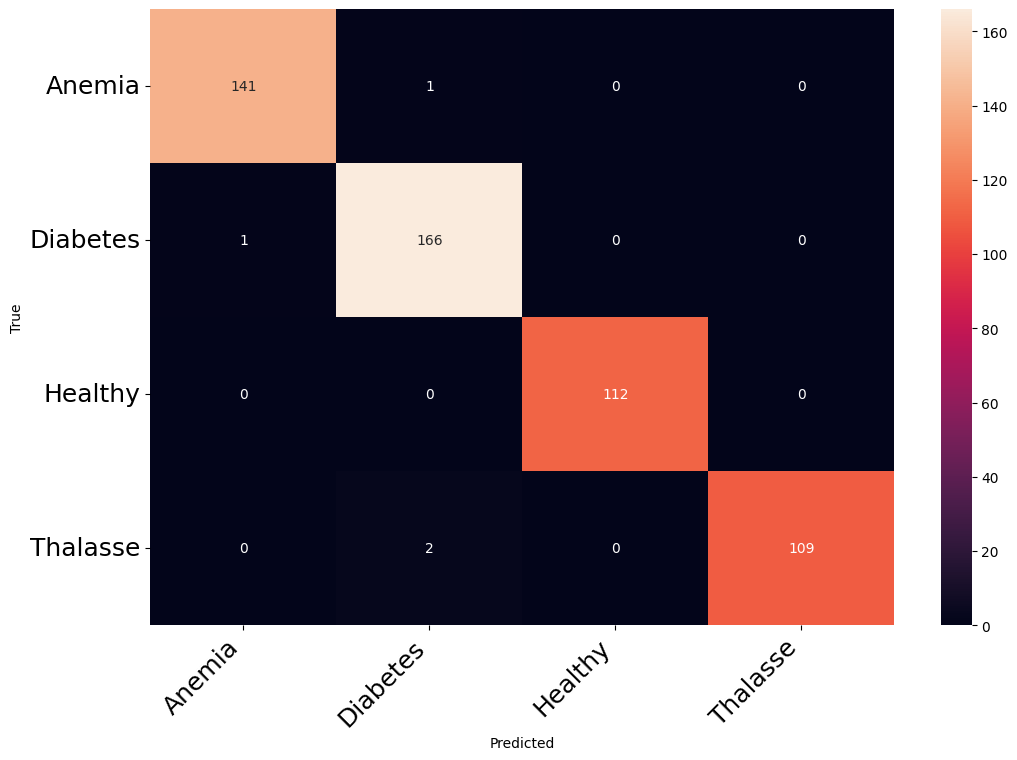

In [91]:
print_confusion_matrix(confusion_matrix(y_test,y_pred),d.values())